In [86]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import datetime


# Load the data
amazon_data = pd.read_csv('7817_1.csv')
flipkart_data = pd.read_csv('flipkart_product.csv', encoding='latin1')


# Remove duplicates
amazon_data.drop_duplicates(subset='reviews.text', inplace=True)
flipkart_data.drop_duplicates(subset='Review', inplace=True)

# Filter out non-English reviews (this is a simple approach and might not catch all non-English reviews)
amazon_data = amazon_data[amazon_data['reviews.text'].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]
flipkart_data = flipkart_data[flipkart_data['Review'].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Text Normalization
def preprocess_text(text):
    # If text is not a string type, return an empty string or convert to string
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    return text
    
amazon_data['processed_review'] = amazon_data['reviews.text'].apply(preprocess_text)
flipkart_data['processed_review'] = flipkart_data['Review'].apply(preprocess_text)


In [87]:
# Display the first few rows of the dataset
print("Amazon Data:")
print(amazon_data.head())
print("\nFlipkart Data:")
print(flipkart_data.head())

# Summary statistics
print("\nAmazon Summary Statistics:")
print(amazon_data.describe())
print("\nFlipkart Summary Statistics:")
print(flipkart_data.describe())


Amazon Data:
                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3

# EXPLORATORY DATA ANALYSIS


FLIPKART DATASET

In [88]:
print(flipkart_data.shape)
print(flipkart_data.info())
print(flipkart_data.isnull().sum())


(1262, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 189537
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductName       1262 non-null   object
 1   Price             1262 non-null   object
 2   Rate              1262 non-null   object
 3   Review            1261 non-null   object
 4   Summary           1262 non-null   object
 5   processed_review  1262 non-null   object
dtypes: object(6)
memory usage: 69.0+ KB
None
ProductName         0
Price               0
Rate                0
Review              1
Summary             0
processed_review    0
dtype: int64


<AxesSubplot:xlabel='review_length', ylabel='Count'>

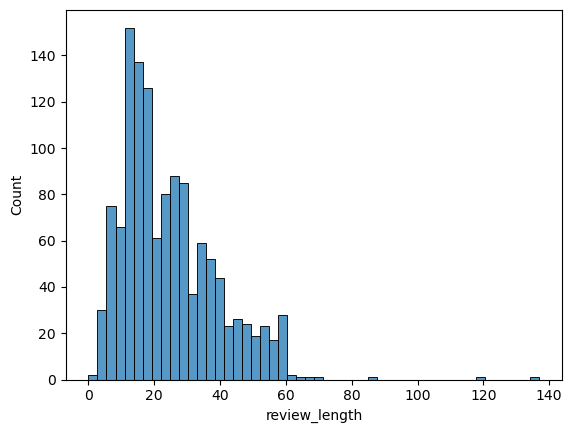

In [89]:
#REVIEW LENGTH ANALYSIS
def compute_length(text):
    if isinstance(text, str):  # Check if the text is a string
        return len(text)
    else:  # If it's NaN or some other type, return 0 or another placeholder value
        return 0

flipkart_data['review_length'] = flipkart_data['processed_review'].apply(compute_length)
sns.histplot(flipkart_data['review_length'], bins=50)


In [90]:
flipkart_data['Rate'] = pd.to_numeric(flipkart_data['Rate'], errors='coerce')


In [91]:
flipkart_data.dropna(subset=['Rate'], inplace=True)


In [92]:
flipkart_data['Rate'].fillna(0, inplace=True)


<AxesSubplot:xlabel='sentiment', ylabel='count'>

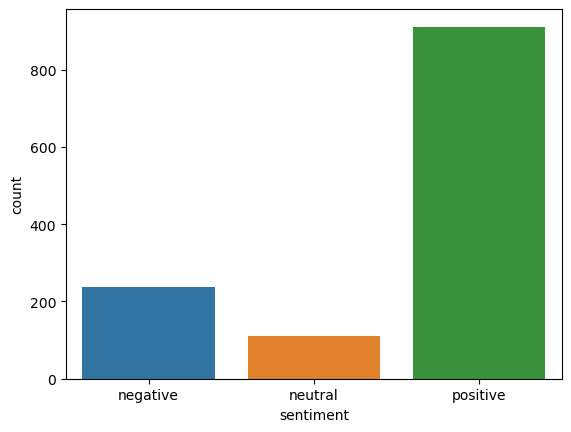

In [93]:
#Sentiment Distribution
flipkart_data['sentiment'] = pd.cut(flipkart_data['Rate'], bins=[0,2,3,5], labels=['negative', 'neutral', 'positive'])
sns.countplot(x='sentiment', data=flipkart_data)


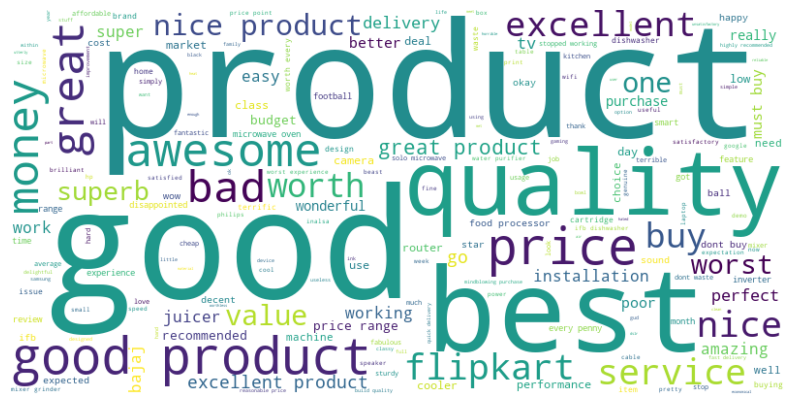

In [94]:
#Word Frequency Analysis
# Filter out non-string reviews
valid_reviews = flipkart_data['processed_review'].dropna().astype(str)

# Join the reviews and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(valid_reviews))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



<AxesSubplot:>

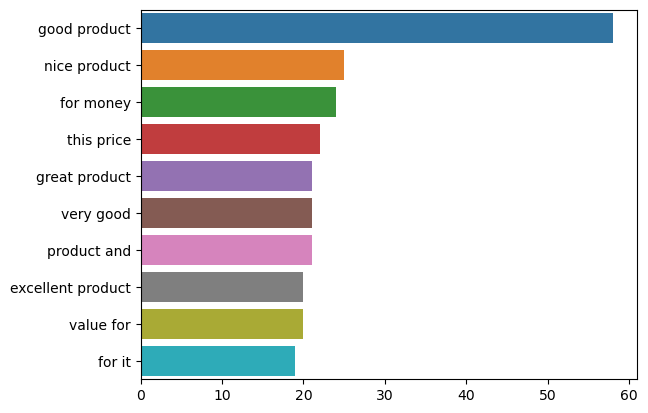

In [95]:
#N-gram Analysis
def get_top_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_ngrams(flipkart_data['processed_review'].dropna(), 10, 2)
x,y = map(list, zip(*top_bigrams))
sns.barplot(x=y, y=x)



In [96]:
print(flipkart_data.columns)


Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary', 'processed_review',
       'review_length', 'sentiment'],
      dtype='object')


In [97]:
print(flipkart_data.head())


                                         ProductName     Price  Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   5.0   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   5.0   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   3.0   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   1.0   
6  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   5.0   

               Review                                            Summary  \
0              Super!  Great cooler.. excellent air flow and for this...   
1             Awesome             Best budget 2 fit cooler. Nice cooling   
2                Fair  The quality is good but the power of air is de...   
3     Useless product                 Very bad product it's a only a fan   
6  Highly recommended                                  Very good product   

     processed_review  review_length sentiment  
0               super              5  positive  
1           

In [98]:
flipkart_data.dropna(subset=['Rate', 'review_length'], inplace=True)
flipkart_data = flipkart_data.dropna(subset=['processed_review'])



# TRADITIONAL SENTIMENT ANALYSIS

In [13]:
#pip install vaderSentiment


In [99]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to each review
flipkart_data['vader_sentiment'] = flipkart_data['processed_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
true_labels = flipkart_data['sentiment']
vader_sentiment = flipkart_data['vader_sentiment']


In [100]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Apply threshold to VADER sentiment scores (replace 0.5 with your threshold)
vader_sentiment_thresholded = (vader_sentiment > 0.5).astype(int)

# Print classification report
print("VADER Sentiment Analysis Report:")
print(classification_report(true_labels_encoded, vader_sentiment_thresholded, target_names=label_encoder.classes_))



VADER Sentiment Analysis Report:
              precision    recall  f1-score   support

    negative       0.28      1.00      0.43       237
     neutral       0.02      0.08      0.03       111
    positive       0.00      0.00      0.00       911

    accuracy                           0.19      1259
   macro avg       0.10      0.36      0.16      1259
weighted avg       0.05      0.19      0.08      1259



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SENTIMENT ANALYSIS USING BERT & ROBERTA


In [16]:
# pip install transformers

In [102]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import torch

# Fine-tune BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenize and encode the training data
encoded_reviews = [tokenizer.encode(review, add_special_tokens=True, truncation=True, padding=True) for review in flipkart_data['processed_review']]

# Find the maximum length among the encoded reviews
max_len = max(len(review) for review in encoded_reviews)

# Pad all the sequences to the maximum length
padded_reviews = [review + [0] * (max_len - len(review)) for review in encoded_reviews]

# Convert the lists of lists to a PyTorch tensor
input_ids = torch.tensor(padded_reviews)

# Assuming 'sentiment' is the name of the column in your DataFrame
column_name = 'sentiment'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'sentiment' column
flipkart_data[column_name] = label_encoder.fit_transform(flipkart_data[column_name])

# Now, 'sentiment' contains numeric labels
labels = torch.tensor(flipkart_data[column_name].values)

# Convert labels to torch.long
labels = labels.long()




# Split the data into training, validation, and test sets
train_size = int(0.8 * len(input_ids))
val_size = int(0.1 * len(input_ids))
test_size = len(input_ids) - train_size - val_size

train_dataset = TensorDataset(input_ids[:train_size], labels[:train_size])
val_dataset = TensorDataset(input_ids[train_size:train_size + val_size], labels[train_size:train_size + val_size])
test_dataset = TensorDataset(input_ids[train_size + val_size:], labels[train_size + val_size:])

# Initialize DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Training loop
optimizer = AdamW(model.parameters(), lr=2e-5)

# Fine-tune the model
for epoch in range(3):  # Adjust the number of epochs based on your project
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        
        # Convert labels to the correct data type
        labels = labels.type(torch.LongTensor)
        
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, labels = batch
        outputs = model(input_ids)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

# Calculate metrics
print("BERT Sentiment Analysis Report:")
print(classification_report(true_labels, predictions))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\himan\AppData\Roaming\Python\Python39\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BERT Sentiment Analysis Report:
              precision    recall  f1-score   support

           0       0.58      0.88      0.70        16
           1       1.00      0.06      0.12        16
           2       0.89      0.96      0.92        95

    accuracy                           0.83       127
   macro avg       0.83      0.63      0.58       127
weighted avg       0.87      0.83      0.79       127



In [19]:
# Assuming 'sentiment' is the name of the column in your DataFrame
num_classes = len(flipkart_data['sentiment'].unique())
print(f"Number of classes: {num_classes}")


Number of classes: 3


In [20]:
print(flipkart_data['sentiment'].unique())


[2 1 0]


In [21]:
# Count occurrences of each class
class_counts = flipkart_data['sentiment'].value_counts()

# Display class counts
print("Class Counts:")
print(class_counts)

# Calculate class imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()

# Display class imbalance ratio
print("\nClass Imbalance Ratio: {:.4f}".format(imbalance_ratio))


Class Counts:
2    911
0    237
1    111
Name: sentiment, dtype: int64

Class Imbalance Ratio: 0.1218


In [104]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import torch
from sklearn.metrics import classification_report

# Fine-tune RoBERTa model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)  # Adjust the number of labels based on your project

# Tokenize and encode the training data
encoded_reviews = [tokenizer.encode(review, add_special_tokens=True, truncation=True, padding=True) for review in flipkart_data['processed_review']]

# Find the maximum length among the encoded reviews
max_len = max(len(review) for review in encoded_reviews)

# Pad all the sequences to the maximum length
padded_reviews = [review + [0] * (max_len - len(review)) for review in encoded_reviews]

# Convert the lists of lists to a PyTorch tensor
input_ids = torch.tensor(padded_reviews)

# Assuming 'sentiment' is the name of the column in your DataFrame
column_name = 'sentiment'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'sentiment' column
flipkart_data[column_name] = label_encoder.fit_transform(flipkart_data[column_name])

# Now, 'sentiment' contains numeric labels
labels = torch.tensor(flipkart_data[column_name].values, dtype=torch.long)  # Ensure that labels are of type torch.long

# Split the data into training, validation, and test sets
train_size = int(0.8 * len(input_ids))
val_size = int(0.1 * len(input_ids))
test_size = len(input_ids) - train_size - val_size

train_dataset = TensorDataset(input_ids[:train_size], labels[:train_size])
val_dataset = TensorDataset(input_ids[train_size:train_size + val_size], labels[train_size:train_size + val_size])
test_dataset = TensorDataset(input_ids[train_size + val_size:], labels[train_size + val_size:])

# Initialize DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Training loop
optimizer = AdamW(model.parameters(), lr=2e-5)

# Fine-tune the RoBERTa model
for epoch in range(3):  # Adjust the number of epochs based on your project
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, labels = batch
        outputs = model(input_ids)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

# Calculate metrics
print("RoBERTa Sentiment Analysis Report:")
print(classification_report(true_labels, predictions))


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\himan\AppData\Roaming\Python\Python39\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


RoBERTa Sentiment Analysis Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        16
           2       0.75      1.00      0.86        95

    accuracy                           0.75       127
   macro avg       0.25      0.33      0.29       127
weighted avg       0.56      0.75      0.64       127



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


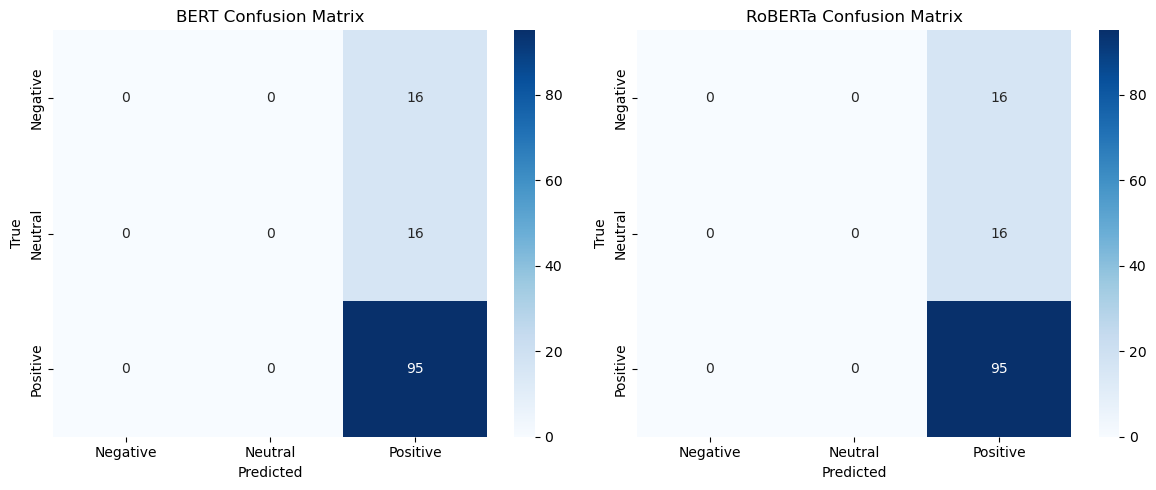

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'true_labels_bert' and 'predictions_bert' are the true labels and predictions for BERT
# 'true_labels_roberta' and 'predictions_roberta' are the true labels and predictions for RoBERTa

# Create confusion matrices
cm_bert = confusion_matrix(true_labels, predictions)
cm_roberta = confusion_matrix(true_labels, predictions)

# Plot the confusion matrices using heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('BERT Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_roberta, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('RoBERTa Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


## TOPIC MODELING

USING BERT

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from transformers import BertTokenizer, BertModel
import torch


# Tokenize the processed reviews using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_reviews = [tokenizer.encode(review, add_special_tokens=True, truncation=True, padding=True) for review in flipkart_data['processed_review']]

# Find the maximum length among the encoded reviews
max_len = max(len(review) for review in encoded_reviews)

# Pad all the sequences to the maximum length
padded_reviews = [review + [0] * (max_len - len(review)) for review in encoded_reviews]

# Convert the lists of lists to a PyTorch tensor
input_ids = torch.tensor(padded_reviews)

# Load the pre-trained BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Get the embeddings for each review
with torch.no_grad():
    model.eval()
    embeddings = model(input_ids)[0][:, 0, :].numpy()  # Extract embeddings from the [CLS] token

# Perform K-Means clustering for topic modeling
num_topics = 5  # Adjust based on your desired number of topics
kmeans = KMeans(n_clusters=num_topics, random_state=42)
topics = kmeans.fit_predict(embeddings)

# Display the reviews for each topic
flipkart_data['topic'] = topics
for topic_idx in range(num_topics):
    topic_reviews = flipkart_data[flipkart_data['topic'] == topic_idx]['processed_review']
    print(f"Topic #{topic_idx} Reviews:")
    print('\n'.join(topic_reviews))
    print('\n' + '='*50 + '\n')


Topic #0 Reviews:
not recommended at all
best product and best buy
dont waste your money
working fine but product quality very cheep
not reliable and bad quality product
black color is not good size fitting and elastic are good
just go for it
ifb dishwasher
wonderful product and super saver
wifes pride maids envy 
nice and sturdy
nice product and perfect product
appropriate size and good quality
dont waste money
excellent and must buy 
go for it
best in class and sturdy for room decoration
good decent product and worth the money
keep it up
good product and very fast delivery of flipkart d
choppers not good
dont waste your money
good quality and value for money
fantastic product and excellent delivery from flipkart
worst product and service including service staff
product not working
best product  best price  just  go for it 
griptoughness and design
nice for kids and teens 
not as soft as it appears
do not waste yr money on this 
good for simple work and medium gaming
very sleep and sh

USING RoBERTa

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from transformers import RobertaTokenizer, RobertaModel
import torch


# Tokenize the processed reviews using RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
encoded_reviews = [tokenizer.encode(review, add_special_tokens=True, truncation=True, padding=True) for review in flipkart_data['processed_review']]

# Find the maximum length among the encoded reviews
max_len = max(len(review) for review in encoded_reviews)

# Pad all the sequences to the maximum length
padded_reviews = [review + [0] * (max_len - len(review)) for review in encoded_reviews]

# Convert the lists of lists to a PyTorch tensor
input_ids = torch.tensor(padded_reviews)

# Load the pre-trained RoBERTa model
model = RobertaModel.from_pretrained('roberta-base')

# Get the embeddings for each review
with torch.no_grad():
    model.eval()
    embeddings = model(input_ids)[0]

# Flatten the embeddings
flattened_embeddings = embeddings.view(embeddings.size(0), -1)

# Assuming flattened_embeddings contains your BERT or RoBERTa embeddings
# Ensure all values are non-negative by adding the absolute minimum value
min_val = flattened_embeddings.min()
flattened_embeddings -= min_val

# Perform Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(flattened_embeddings)



# Display the top words for each topic
feature_names = [f"feature_{i}" for i in range(len(flattened_embeddings[0]))]
for topic_idx, topic in enumerate(lda.components_):
    top_features_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [tokenizer.decode([i]) for i in top_features_idx]
    print(f"Topic #{topic_idx}: {', '.join(top_words)}")
    
    



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Topic #0:  160,  Watts,  real,  Disc,  supremacist,  consequence,  statistics,  Byrne,  Cond,  separatist
Topic #1:  DA, United, estead,  real,  arrangement,  ignorance,  statistics,  disorders, grad,  Oaks
Topic #2:  railways, United,  Lash,  supremacist, estead,  warning,  sounds, grad,  surgeries,  injury
Topic #3:  Watts,  consequence,  noting,  separatist,  ignorance,  Lash,  Sn,  injury,  sounds,  Supreme
Topic #4:  Oaks,  semester,  Patterson,  arrangement,  Lash,  wheel, UG,  disorders,  stole,  separatist


## AMAZON DATASET

### EXPLORATORY DATA ANALYSIS

                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

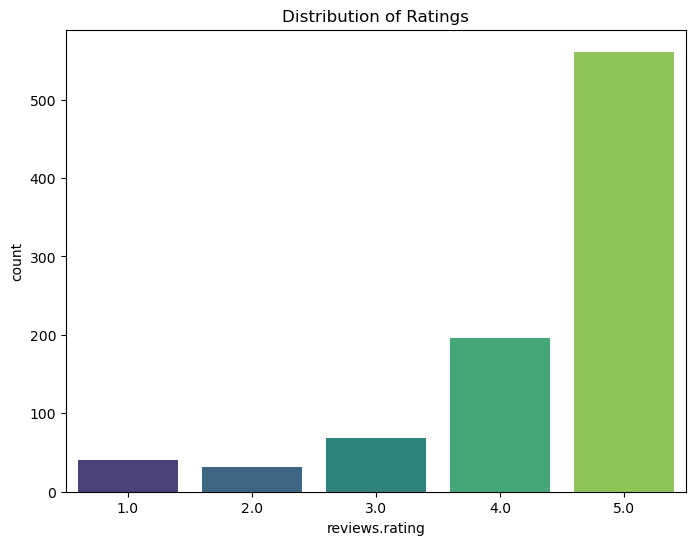

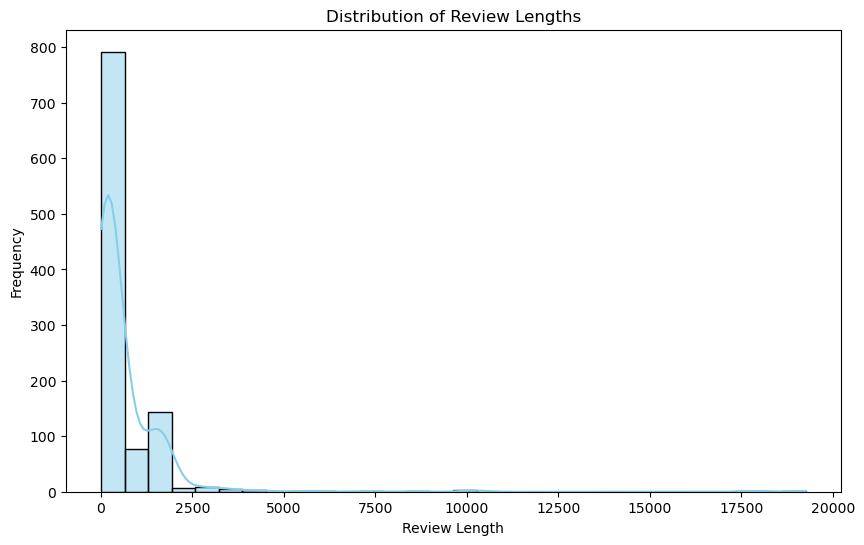

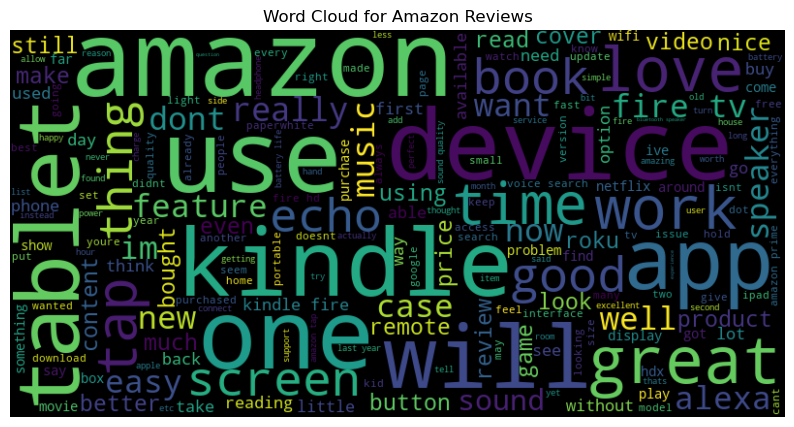

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print(amazon_data.head())

# Get basic information about the dataset
print(amazon_data.info())

# Summary statistics of numerical columns
print(amazon_data.describe())

# Check for missing values
print(amazon_data.isnull().sum())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='reviews.rating', data=amazon_data, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

# Distribution of review lengths
amazon_data['review_length'] = amazon_data['processed_review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['review_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Word cloud for reviews
from wordcloud import WordCloud

# Concatenate all reviews into a single string
all_reviews = ' '.join(amazon_data['processed_review'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=110).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Amazon Reviews')
plt.show()


In [35]:
print(amazon_data['reviews.rating'].head())
print(amazon_data['reviews.rating'].dtype)



0    5.0
1    5.0
2    4.0
3    5.0
4    5.0
Name: reviews.rating, dtype: float64
float64


Label Distribution:
 positive    757
negative     72
neutral      69
Name: Actual_sentiment, dtype: int64


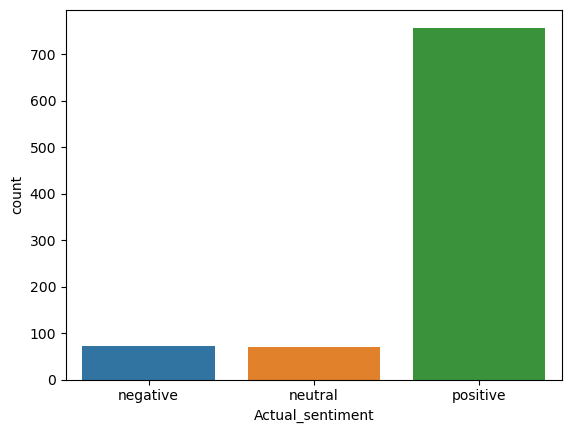

In [65]:
import pandas as pd
import seaborn as sns

import pandas as pd

# Replace nan values with a default value (e.g., 0)
amazon_data['reviews.rating'] = amazon_data['reviews.rating'].fillna(0)

# Binning process
amazon_data['Actual_sentiment'] = pd.cut(amazon_data['reviews.rating'], bins=[0, 2, 3, 5], labels=['negative', 'neutral', 'positive'])

sns.countplot(x='Actual_sentiment', data=amazon_data)

# Check the label distribution
label_distribution = amazon_data['Actual_sentiment'].value_counts()
print("Label Distribution:\n", label_distribution)


In [22]:
print(amazon_data.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight', 'processed_review'],
      dtype='object')


In [66]:
# Assuming 'Actual_sentiment' is the column containing your labels
unique_classes = amazon_data['Actual_sentiment'].dropna().unique()

# Print the unique classes
print(unique_classes)


['positive', 'neutral', 'negative']
Categories (3, object): ['negative' < 'neutral' < 'positive']


In [67]:
# Check for missing values in the 'Actual_sentiment' column
missing_values = amazon_data['Actual_sentiment'].isnull().sum()

# Print the number of missing values
print("Number of missing values in 'Actual_sentiment':", missing_values)

# If you want to see the rows with missing values, you can use:
# missing_rows = amazon_data[amazon_data['Actual_sentiment'].isnull()]
# print(missing_rows)


Number of missing values in 'Actual_sentiment': 150


### SENTIMENT ANALYSIS USING VADER

In [25]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
import nltk
nltk.download('vader_lexicon')


# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create a new column for sentiment scores in your dataset
amazon_data['Sentiment'] = amazon_data['processed_review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Define a function to categorize sentiment scores
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new column for sentiment labels (Positive, Negative, Neutral)
amazon_data['Sentiment_Label'] = amazon_data['Sentiment'].apply(categorize_sentiment)

# Display the results
print(amazon_data[['processed_review', 'Sentiment', 'Sentiment_Label']])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                       processed_review  Sentiment  \
0     i initially had trouble deciding between the p...     0.9799   
1     allow me to preface this with a little history...     0.9868   
2     i am enjoying it so far great for reading had ...     0.4364   
3     i bought one of the first paperwhites and have...     0.9734   
4     i have to say upfront  i dont like coroporate ...     0.9922   
...                                                 ...        ...   
1592  this is not the same remote that i got for my ...    -0.6249   
1593  i have had to change the batteries in this rem...    -0.9205   
1594  remote did not activate nor did it connect to ...    -0.8126   
1595  it does the job but is super over priced i fee...     0.8271   
1596  i ordered this item to replace the one that no...    -0.8630   

     Sentiment_Label  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  
...              ... 

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a column named 'Actual_Sentiment' in your dataset with actual sentiment labels
# Replace 'Actual_Sentiment' with the actual column name in your dataset
actual_sentiments = amazon_data['Actual_sentiment'].astype(str)
predicted_sentiments = amazon_data['Sentiment_Label'].astype(str)

# Calculate accuracy
accuracy = accuracy_score(actual_sentiments, predicted_sentiments)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(actual_sentiments, predicted_sentiments))

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(actual_sentiments, predicted_sentiments))


Accuracy: 0.00
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       0.0
     Neutral       0.00      0.00      0.00       0.0
    Positive       0.00      0.00      0.00       0.0
         nan       0.00      0.00      0.00     150.0
    negative       0.00      0.00      0.00      72.0
     neutral       0.00      0.00      0.00      69.0
    positive       0.00      0.00      0.00     757.0

    accuracy                           0.00    1048.0
   macro avg       0.00      0.00      0.00    1048.0
weighted avg       0.00      0.00      0.00    1048.0

Confusion Matrix:
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [ 22   1 127   0   0   0   0]
 [ 31   6  35   0   0   0   0]
 [ 11   3  55   0   0   0   0]
 [ 36  32 689   0   0   0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [27]:
# Display the column names in your DataFrame
print(amazon_data.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight', 'processed_review', 'Actual_sentiment',
       'review_length', 'Sentiment', 'Sentiment_Label'],
      dtype='object')


### SENTIMENT ANALYSIS USING BERT

In [69]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
import torch
from sklearn.metrics import classification_report
import numpy as np

# Fine-tune BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

# Tokenize and encode the training data
encoded_reviews = [tokenizer.encode(review, add_special_tokens=True, truncation=True, padding=True) for review in amazon_data['processed_review']]

# Find the maximum length among the encoded reviews
max_len = max(len(review) for review in encoded_reviews)

# Pad all the sequences to the maximum length
padded_reviews = [review + [0] * (max_len - len(review)) for review in encoded_reviews]

# Convert the lists of lists to a PyTorch tensor
input_ids = torch.tensor(padded_reviews)

# Assuming 'sentiment' is the name of the column in your DataFrame
column_name = 'Actual_sentiment'

# Assuming 'Actual_sentiment' is the column containing your labels
unique_labels = amazon_data['Actual_sentiment'].unique()

# Map unique labels to integers starting from 0
class_to_index = {class_name: index for index, class_name in enumerate(unique_labels)}

# Create a new column with integer labels
amazon_data['label'] = amazon_data['Actual_sentiment'].map(class_to_index)

# Now, 'label' contains numeric labels starting from 0
labels = torch.tensor(amazon_data['label'].values)

# Convert labels to torch.long
labels = labels.long()

# Initialize LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(amazon_data['Actual_sentiment'])


# Encode the 'sentiment' column
amazon_data[column_name] = label_encoder.fit_transform(amazon_data[column_name])


# Now, 'sentiment' contains numeric labels
labels = torch.tensor(amazon_data[column_name].values)

# Convert labels to torch.long
labels = labels.long()




# Split the data into training, validation, and test sets
train_size = int(0.8 * len(input_ids))
val_size = int(0.1 * len(input_ids))
test_size = len(input_ids) - train_size - val_size

train_dataset = TensorDataset(input_ids[:train_size], labels[:train_size])
val_dataset = TensorDataset(input_ids[train_size:train_size + val_size], labels[train_size:train_size + val_size])
test_dataset = TensorDataset(input_ids[train_size + val_size:], labels[train_size + val_size:])

# Initialize DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Training loop
optimizer = AdamW(model.parameters(), lr=2e-5)

# Fine-tune the model
for epoch in range(3):  # Adjust the number of epochs based on your project
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        
        # Convert labels to the correct data type
        labels = labels.type(torch.LongTensor)
        
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, labels = batch
        outputs = model(input_ids)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

# Calculate metrics
print("BERT Sentiment Analysis Report:")
print(classification_report(true_labels, predictions))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\himan\AppData\Roaming\Python\Python39\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BERT Sentiment Analysis Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        11
           2       0.67      0.95      0.78        63
           3       0.00      0.00      0.00         4

    accuracy                           0.57       106
   macro avg       0.17      0.24      0.20       106
weighted avg       0.40      0.57      0.47       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# Assuming 'Actual_sentiment' is the column containing your labels
unique_labels = amazon_data['Actual_sentiment'].unique()
print("Unique Labels:", unique_labels)


Unique Labels: ['positive', NaN, 'neutral', 'negative']
Categories (3, object): ['negative' < 'neutral' < 'positive']


In [64]:
print(amazon_data['reviews.rating'].unique())

[5. 4. 0. 3. 1. 2.]


### SENTIMENT ANALYSIS USING ROBERTA

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch

# Load your dataset (replace 'your_file_path.csv' with the actual path)
# Assuming your dataset has columns like 'processed_review' and 'Actual_sentiment'


# Assuming 'Actual_sentiment' is the column containing your labels
column_name = 'Actual_sentiment'

# Map unique labels to integers starting from 0
label_encoder = LabelEncoder()
amazon_data['label'] = label_encoder.fit_transform(amazon_data[column_name])

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(amazon_data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Fine-tune RoBERTa model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=label_encoder.classes_.shape[0])

# Tokenize and encode the training data
encoded_reviews = [tokenizer.encode(review, add_special_tokens=True, truncation=True, padding=True) for review in train_data['processed_review']]
max_len = max(len(review) for review in encoded_reviews)
padded_reviews = [review + [0] * (max_len - len(review)) for review in encoded_reviews]
input_ids = torch.tensor(padded_reviews)

# Encode the labels
labels = torch.tensor(train_data['label'].values)

# Create TensorDataset
train_dataset = TensorDataset(input_ids, labels)

# Initialize DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Training loop
optimizer = AdamW(model.parameters(), lr=2e-5)

# Fine-tune the model
for epoch in range(3):  # Adjust the number of epochs based on your project
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation on the test set
model.eval()
test_reviews = [tokenizer.encode(review, add_special_tokens=True, truncation=True, padding=True) for review in test_data['processed_review']]
max_len = max(len(review) for review in test_reviews)
padded_reviews = [review + [0] * (max_len - len(review)) for review in test_reviews]
input_ids = torch.tensor(padded_reviews)
labels = torch.tensor(test_data['label'].values)

test_dataset = TensorDataset(input_ids, labels)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

predictions = []
true_labels = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, labels = batch
        outputs = model(input_ids)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

# Decode labels
decoded_predictions = label_encoder.inverse_transform(predictions)
decoded_true_labels = label_encoder.inverse_transform(true_labels)

# Calculate metrics
print("RoBERTa Sentiment Analysis Report:")
print(classification_report(decoded_true_labels, decoded_predictions))


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\himan\AppData\Roaming\Python\Python39\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


RoBERTa Sentiment Analysis Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         2
           2       0.80      0.95      0.87        83
           3       0.17      0.09      0.12        11

    accuracy                           0.76       105
   macro avg       0.24      0.26      0.25       105
weighted avg       0.65      0.76      0.70       105



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
